# DAPGEO-02 Well Logs 
## Phase 3: 230 - 426 m

### Curve abbreviations

- GR: Total gamma ray (API)
- K: Potassium content (%)
- TH: Thorium content (ppm)
- U: Uranium content (ppm)
- N8: 8” normal resistivity (Ωm)
- N16: 16’’ normal resistivity (Ωm)
- N32: 32’’ normal resistivity (Ωm)
- N64: 64’’ normal resistivity (Ωm)
- SPR: Single Point Resistance (Ω)
- MA16: 16” chargeability (ms)
- MA64: 64’’ chargeability (ms)
- V_P-WAVE_SONIC: Processed P-wave velocity Sonic (m/s)
- V_P-WAVE_PS: Processed P-wave velocity PS suspension logging (m/s)
- V_S-WAVE_PS_1: Processed S-wave velocity PS suspension logging, upper section 1m interval (m/s)
- V_S-WAVE_PS_2: Processed S-wave velocity PS suspension logging, lower section 0.5 m interval (m/s)
- TPOR: NMR Porosity (-)
- T2LM: Geometric mean of the T2 distribution (ms)
- MOVEABLE_WATER: Contribution moveable water to porosity (-)
- CLAY_BOUND_WATER: Contribution clay bound water to porosity (-)
- BOUND_WATER: Contribution capillary bound water to porosity (-)
- K_KSDR: Hydraulic conductivity (m/d) (Schlumberger Doll Research)
- K_KTIM: Hydraulic conductivity (m/d) (Timur-Coates)
- RX1-1A: Sonic wave amplitudes at the first receiver (-)
- RX1-2A: Sonic wave amplitudes at the first receiver (-); long time window
- RX2-1A: Sonic wave amplitudes at the second receiver (-)
- RX3-2A: Sonic wave amplitudes at the third receiver (-)

In [1]:
from sys import stdout
import lasio , os  
import numpy as np    
import pandas as pd   

import matplotlib as mpl  
import matplotlib.pyplot as plt

%matplotlib inline   

In [2]:
# This function converts null values to NaN
# E.g. null = -9999.25 > Type <print(lasfile.well)> to find out this value
def valtonan(inp, val=-99999.000000):
    """Convert all 'val' to NaN's."""
    inp[inp==val] = np.nan
    return inp

#This function makes for cleaner axis plotting
def remove_last(ax, which='upper'):
    """Remove <which> from x-axis of <ax>.
    which: 'upper', 'lower', 'both'
    """
    nbins = len(ax.get_xticklabels())
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(nbins=nbins, prune=which))

#This function smoothes the curves for better visualization
def smooth(data, window_len=10):
    """Smooth the data using a window with requested size."""
    s_p = np.r_[2*data[0]-data[window_len:1:-1],
                data, 2*data[-1]-data[-1:-window_len:-1]]
    w_p = np.ones(window_len, 'd')
    y_p = np.convolve(w_p/w_p.sum(), s_p, mode='same')
    return y_p[window_len-1:-window_len+1]


In [3]:
# Loading data

# Gamma Ray and Radioactive Elements
p3_kut = pd.read_csv('../data/interim/phase3_K_U_T.csv')
p3_gr = pd.read_csv('../data/interim/phase3_GR.csv')

#VSP
p3_vsp = pd.read_csv('../data/interim/phase3_VSP.csv')

#SPR
p3_spr = pd.read_csv('../data/interim/phase3_SPR.csv')

# Electrical Resistivity N8, N16, N32, N64

p3_n8 = pd.read_csv('../data/interim/phase3_N8.csv')
p3_n16 = pd.read_csv('../data/interim/phase3_N16.csv')
p3_n32 = pd.read_csv('../data/interim/phase3_N32.csv')
p3_n64 = pd.read_csv('../data/interim/phase3_N64.csv')

# Polarization Logs
p3_ma16 = pd.read_csv('../data/interim/phase3_MA16.csv')
p3_ma64 = pd.read_csv('../data/interim/phase3_MA64.csv')

# PS Suspension
p3_ps = pd.read_csv('../data/interim/phase3_RX1-1A.csv')

#
p3_tkk = pd.read_csv('../data/interim/phase3_T2LM_KTIM_KSDR.csv')
p3_tpor = pd.read_csv('../data/interim/phase3_TPOR.csv')

#Water vol
p3_water = pd.read_csv('../data/interim/phase3_WATER.csv')

# Loading VPVS (.las version 2)
p3_vpvs = lasio.read(os.path.join('../data/raw/DAPGEO-02_500m_PHASE3_VPVS_processed.las'))

#RX1-1A
p3_rx1_1A = pd.read_csv('../data/interim/phase3_RX1-1A.csv')


In [4]:
# Converting invalid values to NAN
p3_vsp=valtonan(p3_vsp)
p3_spr=valtonan(p3_spr)

p3_n8=valtonan(p3_n8)
p3_n16=valtonan(p3_n16)
p3_n32=valtonan(p3_n32)
p3_n64=valtonan(p3_n64)

p3_ps=valtonan(p3_ps)

p3_tkk=valtonan(p3_tkk)
p3_tpor=valtonan(p3_tpor)
p3_water=valtonan(p3_water)

p3_rx1_1A=valtonan(p3_rx1_1A)


/tmp/ipykernel_462/1959490770.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1)
/tmp/ipykernel_462/1959490770.py:28: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax3.set_ylim(430)


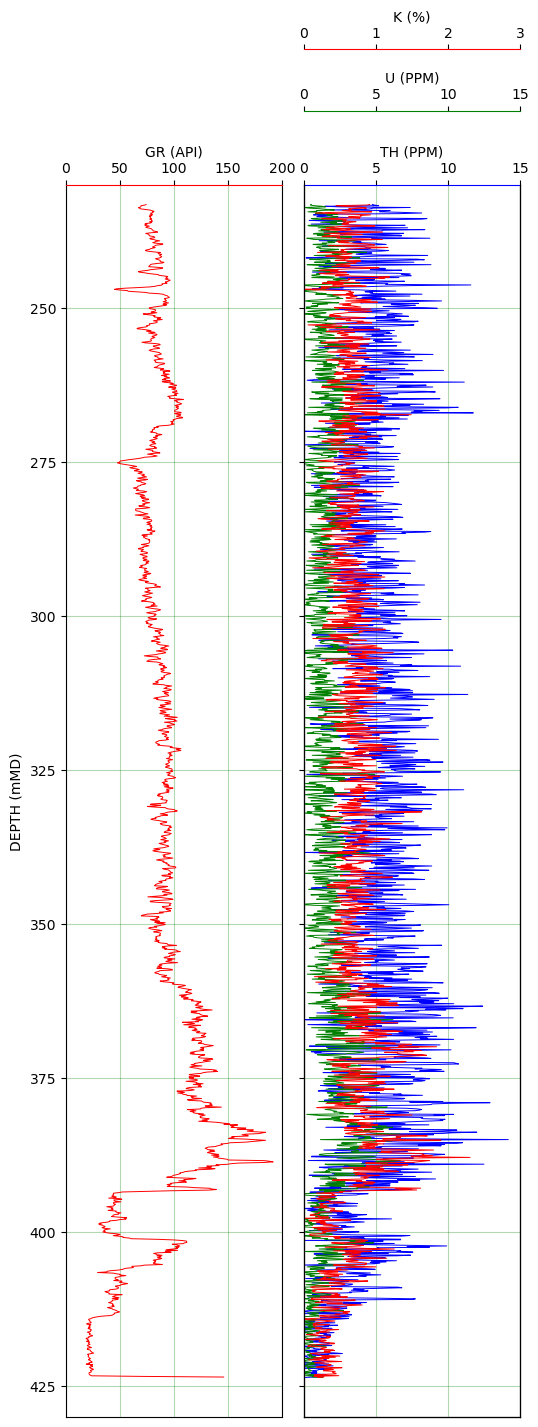

In [5]:
f1, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f1.subplots_adjust(wspace = 0.1)

curve_names = ['GR (API)', 'TH (PPM)','U (PPM)','K (%)']

#Set up the plot axes
ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

#Set up the individual log tracks
ax1.plot(p3_gr['GR.API'], p3_gr['DEPTH.M'], color = "red", lw = 0.7)
ax1.set_xlim(0,200)
ax1.set_ylim(230,430)
ax1.spines['top'].set_edgecolor('red')
ax1.set_ylabel('DEPTH (mMD)')
ax1.invert_yaxis()

ax2.plot(p3_kut['TH.PPM'], p3_kut['DEPTH.M'], color = "blue", lw = 0.7)
ax2.set_xlim(0, 15)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(p3_kut['U.PPM'], p3_kut['DEPTH.M'], color = "green", lw = 0.7)
ax3.set_xlim(0, 15)
ax3.set_ylim(430)
ax3.spines['top'].set_edgecolor('green')

ax4.plot(p3_kut['K.%'], p3_kut['DEPTH.M'], color = "red", lw = 0.7)
ax4.set_xlim(0, 3)
ax4.set_ylim(230,430)
ax4.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f1.axes):
     
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 2:
        ax.spines["top"].set_position(("axes", 0.96+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax2, ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_GR_KUTH.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/235629442.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


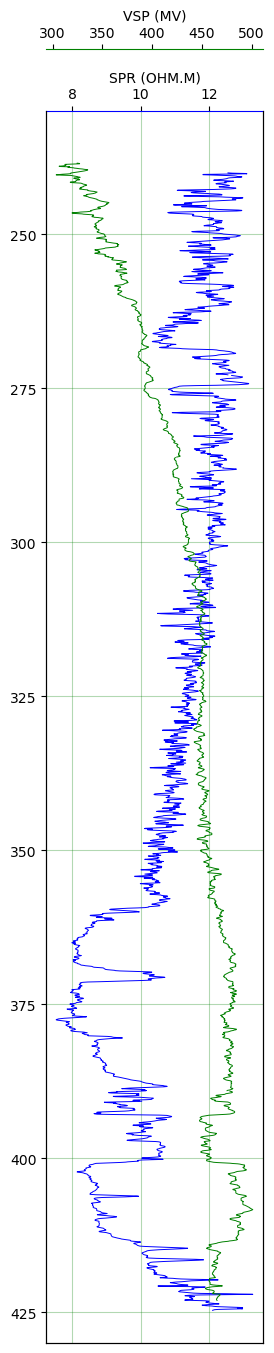

In [6]:
f2, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f2.subplots_adjust(wspace = 0.1)

curve_names = ['SPR (OHM.M)','VSP (MV)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

ax2.plot(p3_spr['SPR.OHM'], p3_spr['DEPTH.M'], color = "blue", lw = 0.7)
#ax2.set_xlim(0, 25)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('blue')

ax3.plot(p3_vsp['VSP.MV'], p3_vsp['DEPTH.M'], color = "green", lw = 0.7)
#ax3.set_xlim(0, 25)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('green')


#Set up the common elements between the subplots
for i, ax in enumerate(f2.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_VSP_SPR.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/825289852.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


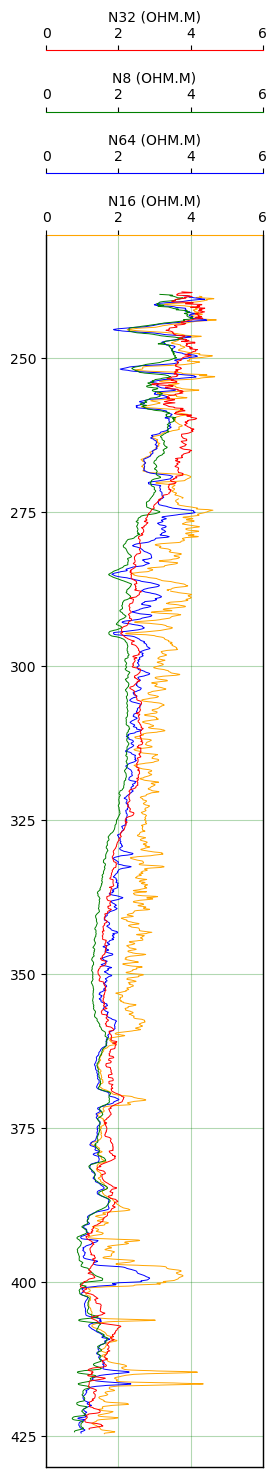

In [7]:
f3, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f3.subplots_adjust(wspace = 0.1)

curve_names = ['N16 (OHM.M)', 'N64 (OHM.M)','N8 (OHM.M)', 'N32 (OHM.M)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()

#N8
ax2.plot(p3_n8['N8.OHM.M'], p3_n8['DEPTH.M'], color = "orange", lw = 0.7)
ax2.set_xlim(0, 6)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('orange')

#N16
ax3.plot(p3_n16['N16.OHM.M'], p3_n16['DEPTH.M'], color = "blue", lw = 0.7)
ax3.set_xlim(0, 6)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('blue')

#N32
ax4.plot(p3_n32['N32.OHM.M'], p3_n32['DEPTH.M'], color = "green", lw = 0.7)
ax4.set_xlim(0, 6)
ax4.set_ylim(230,430)
ax4.spines['top'].set_edgecolor('green')

#N64
ax5.plot(p3_n64['N64.OHM.M'], p3_n64['DEPTH.M'], color = "red", lw = 0.7)
ax5.set_xlim(0, 6)
ax5.set_ylim(230,430)
ax5.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f3.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_RES.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/553169544.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


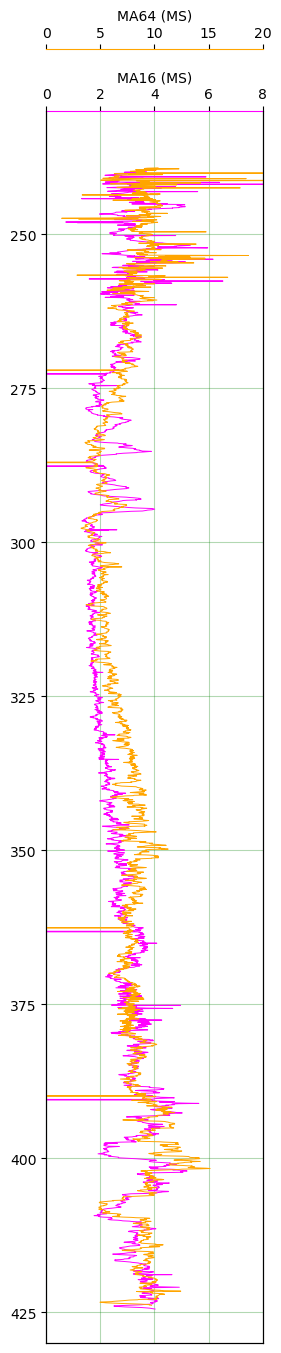

In [8]:
f4, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f4.subplots_adjust(wspace = 0.1)

curve_names = ['MA16 (MS)','MA64 (MS)']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

ax2.plot(p3_ma16['MA16.MS'], p3_ma16['DEPTH.M'], color = "magenta", lw = 0.7)
ax2.set_xlim(0, 8)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('magenta')

ax3.plot(p3_ma64['MA64.MS'], p3_ma64['DEPTH.M'], color = "orange", lw = 0.7)
ax3.set_xlim(0, 20)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('orange')


#Set up the common elements between the subplots
for i, ax in enumerate(f4.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_IP.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/2371607106.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


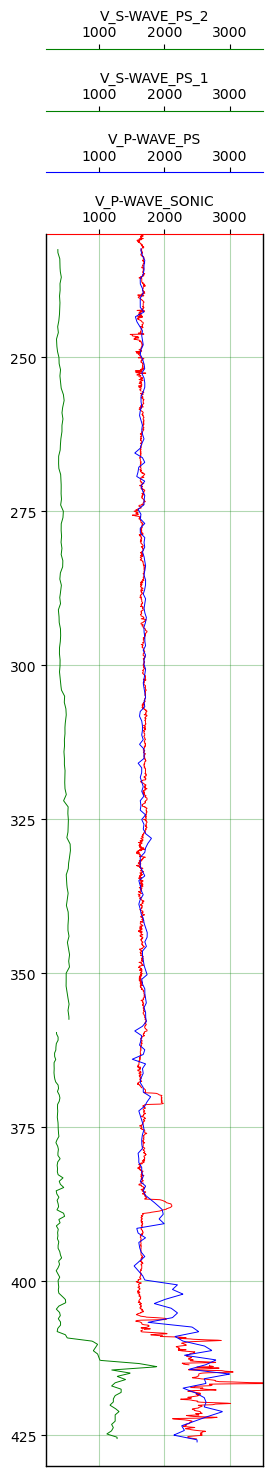

In [9]:
f5, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f5.subplots_adjust(wspace = 0.1)

curve_names = ['V_P-WAVE_SONIC', 'V_P-WAVE_PS','V_S-WAVE_PS_1', 'V_S-WAVE_PS_2']

#Set up the plot axes
#ax1 = plt.subplot2grid((1,4), (0,0), rowspan=1, colspan = 1) 
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()

#V_P-WAVE_SONIC
ax2.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'], color = "red", lw = 0.7)
ax2.set_xlim(200, 3500)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('red')

#V_P-WAVE_PS
ax3.plot(p3_vpvs['V_P-WAVE_PS'], p3_vpvs['DEPT'], color = "blue", lw = 0.7)
ax3.set_xlim(200, 3500)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('blue')

#V_S-WAVE_PS_1
ax4.plot(p3_vpvs['V_S-WAVE_PS_1'], p3_vpvs['DEPT'], color = "green", lw = 0.7)
ax4.set_xlim(200, 3500)
ax4.set_ylim(230,430)
ax4.spines['top'].set_edgecolor('green')

#V_S-WAVE_PS_2
ax5.plot(p3_vpvs['V_S-WAVE_PS_2'], p3_vpvs['DEPT'], color = "green", lw = 0.7)
ax5.set_xlim(200, 3500)
ax5.set_ylim(230,430)
ax5.spines['top'].set_edgecolor('green')

#Set up the common elements between the subplots
for i, ax in enumerate(f5.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_VPVS.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/3374083364.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


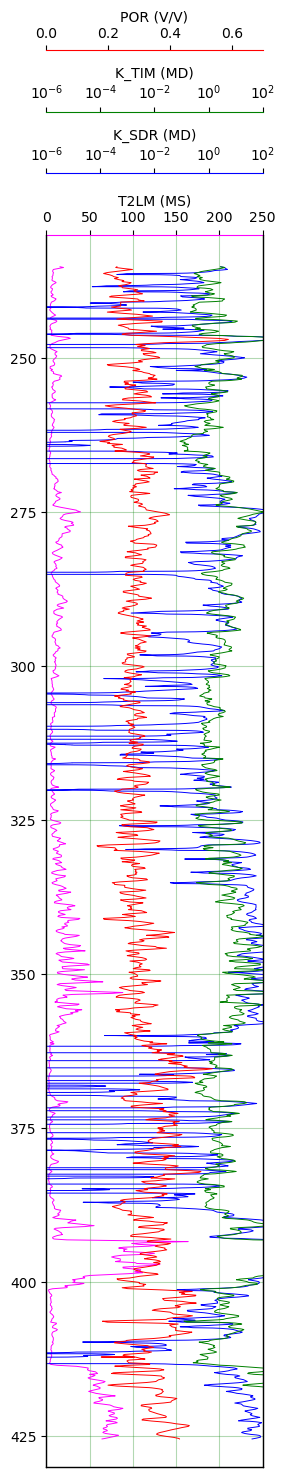

In [10]:
f6, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f6.subplots_adjust(wspace = 0.1)

curve_names = ['T2LM (MS)', 'K_SDR (MD)', 'K_TIM (MD)','POR (V/V)']

#Set up the plot axes
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()
ax5 = ax2.twiny()

# T2LM
ax2.plot(p3_tkk['T2LM.MS'], p3_tkk['DEPTH.M'], color = "magenta", lw = 0.7)
ax2.set_xlim(0, 250)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('magenta')

#KTIM
ax3.plot(p3_tkk['KTIM.MD'], p3_tkk['DEPTH.M'], color = "blue", lw = 0.7)
ax3.set_xscale('log')
ax3.set_xlim(0.000001, 100)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('blue')

#KSDR
ax4.plot(p3_tkk['KSDR.MD'], p3_tkk['DEPTH.M'], color = "green", lw = 0.7)
ax4.set_xscale('log')
ax4.set_xlim(0.000001, 100)
ax4.set_ylim(230,430)
ax4.spines['top'].set_edgecolor('green')

#TPOR
ax5.plot(p3_tpor['POR.VV'], p3_tpor['DEPTH.M'], color = "red", lw = 0.7)
ax5.set_xlim(0, 0.7)
ax5.set_ylim(230,430)
ax5.spines['top'].set_edgecolor('red')

#Set up the common elements between the subplots
for i, ax in enumerate(f6.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4, ax5]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_POR_K.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/1857555470.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


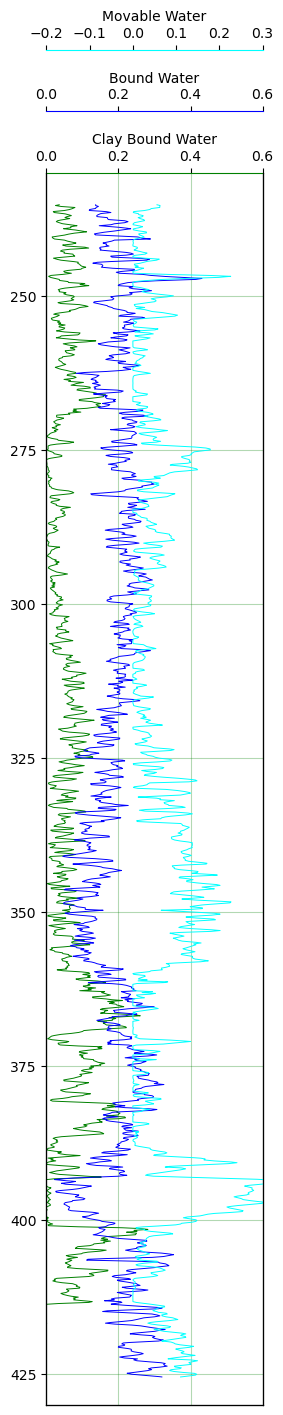

In [11]:
f7, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f7.subplots_adjust(wspace = 0.1)

curve_names = ['Clay Bound Water', 'Bound Water', 'Movable Water']

#Set up the plot axes
ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()
ax4 = ax2.twiny()

# CBW
ax2.plot(p3_water['CLAY_BOUND_WATER.V/V'], p3_water['DEPTH.M'], color = "green", lw = 0.7)
ax2.set_xlim(0, 0.6)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('green')

#BW
ax3.plot(p3_water['BOUND_WATER.V/V'], p3_water['DEPTH.M'], color = "blue", lw = 0.7)
ax3.set_xlim(0, 0.6)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('blue')

#MW
ax4.plot(p3_water['MOVABLE_WATER.V/V'], p3_water['DEPTH.M'], color = "cyan", lw = 0.7)
ax4.set_xlim(-0.2, 0.3)
ax4.set_ylim(230,430)
ax4.spines['top'].set_edgecolor('cyan')

#Set up the common elements between the subplots
for i, ax in enumerate(f7.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1+(i/20)))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ax3, ax4]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()

# Uncomment to save the figure
#plt.savefig('DAPGEO-02_P3_WATER.png', bbox_inches='tight', dpi=300)

/tmp/ipykernel_462/1648410788.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)


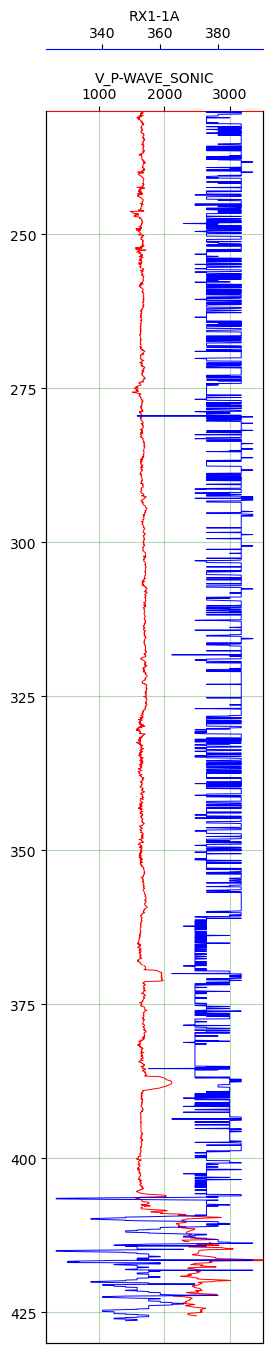

In [12]:

f8, ax1 = plt.subplots(figsize=(12,16))
#Reduce the space between each subplot
f8.subplots_adjust(wspace = 0.1)
#ax1 = plt.gca()
#ax1.invert_yaxis()

curve_names = ['V_P-WAVE_SONIC', 'RX1-1A']

#Set up the plot axes

ax2 = plt.subplot2grid((1,4), (0,1), rowspan=1, colspan = 1)
ax3 = ax2.twiny()

#V_P-WAVE_SONIC
ax2.plot(p3_vpvs['V_P-WAVE_SONIC'], p3_vpvs['DEPT'], color = "red", lw = 0.7)
ax2.set_xlim(200, 3500)
ax2.set_ylim(230,430)
ax2.spines['top'].set_edgecolor('red')

#RX1-1A
ax3.plot(p3_rx1_1A['RX1-1A.DT.US'], p3_rx1_1A['DEPTH.M'], color = "blue", lw = 0.7)
#ax3.set_xlim(200, 350)
ax3.set_ylim(230,430)
ax3.spines['top'].set_edgecolor('blue')

#Set up the common elements between the subplots
for i, ax in enumerate(f8.axes):
    #ax.set_ylim(450,0) # Set the depth range
    
    ax.xaxis.set_ticks_position("top")
    ax.xaxis.set_label_position("top")
    ax.set_xlabel(curve_names[i])
    
    if i >= 1:
        ax.spines["top"].set_position(("axes", 1.05))
    else:
        ax.grid(True, c="g", alpha=0.3)

#Hide tick labels on the y-axis 
for ax in [ ax3]:
    plt.setp(ax.get_yticklabels(), visible = False)
    
axs = plt.gca()
axs.invert_yaxis()


